In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import os
import numpy as np
from pandas.compat import StringIO
from pandas.io.common import urlopen
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from datetime import datetime
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from datetime import datetime
from arctic import Arctic
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
store = Arctic('localhost')
store.initialize_library('ETF')
library = store['ETF']

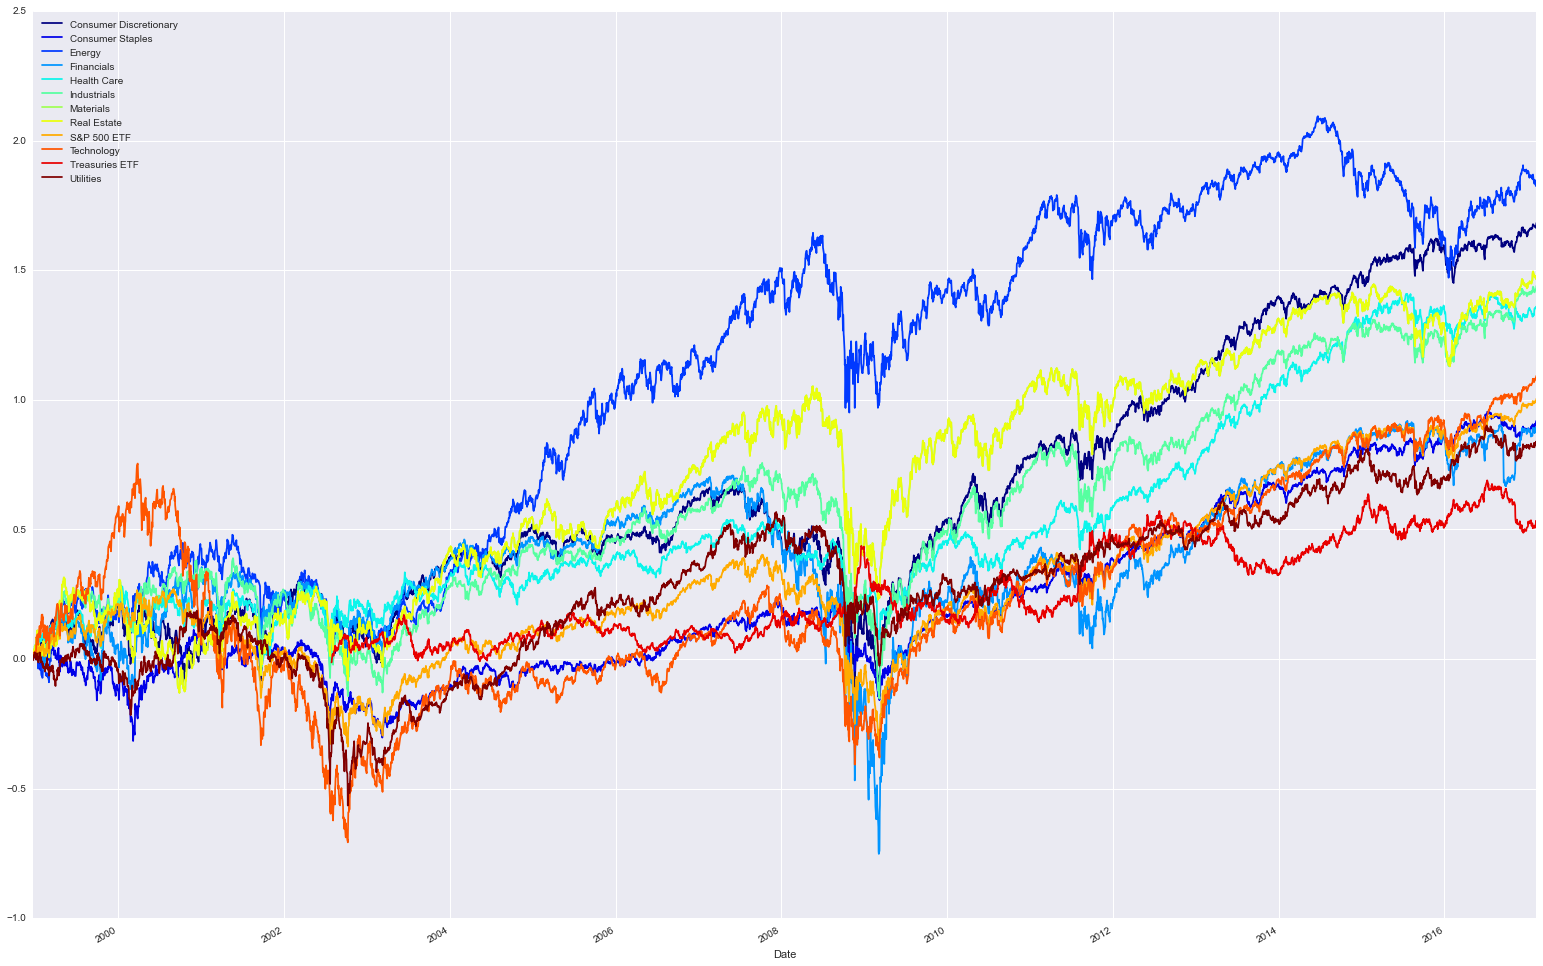

In [3]:
df = pd.DataFrame()
for m in library.list_symbols():
    df[m]=library.read(m).data.Close
df.pct_change().cumsum().plot(colormap='jet')

In [4]:
library.list_symbols()

[u'Consumer Discretionary',
 u'Consumer Staples',
 u'Energy',
 u'Financials',
 u'Health Care',
 u'Industrials',
 u'Materials',
 u'Real Estate',
 u'S&P 500 ETF',
 u'Technology',
 u'Treasuries ETF',
 u'Utilities']

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


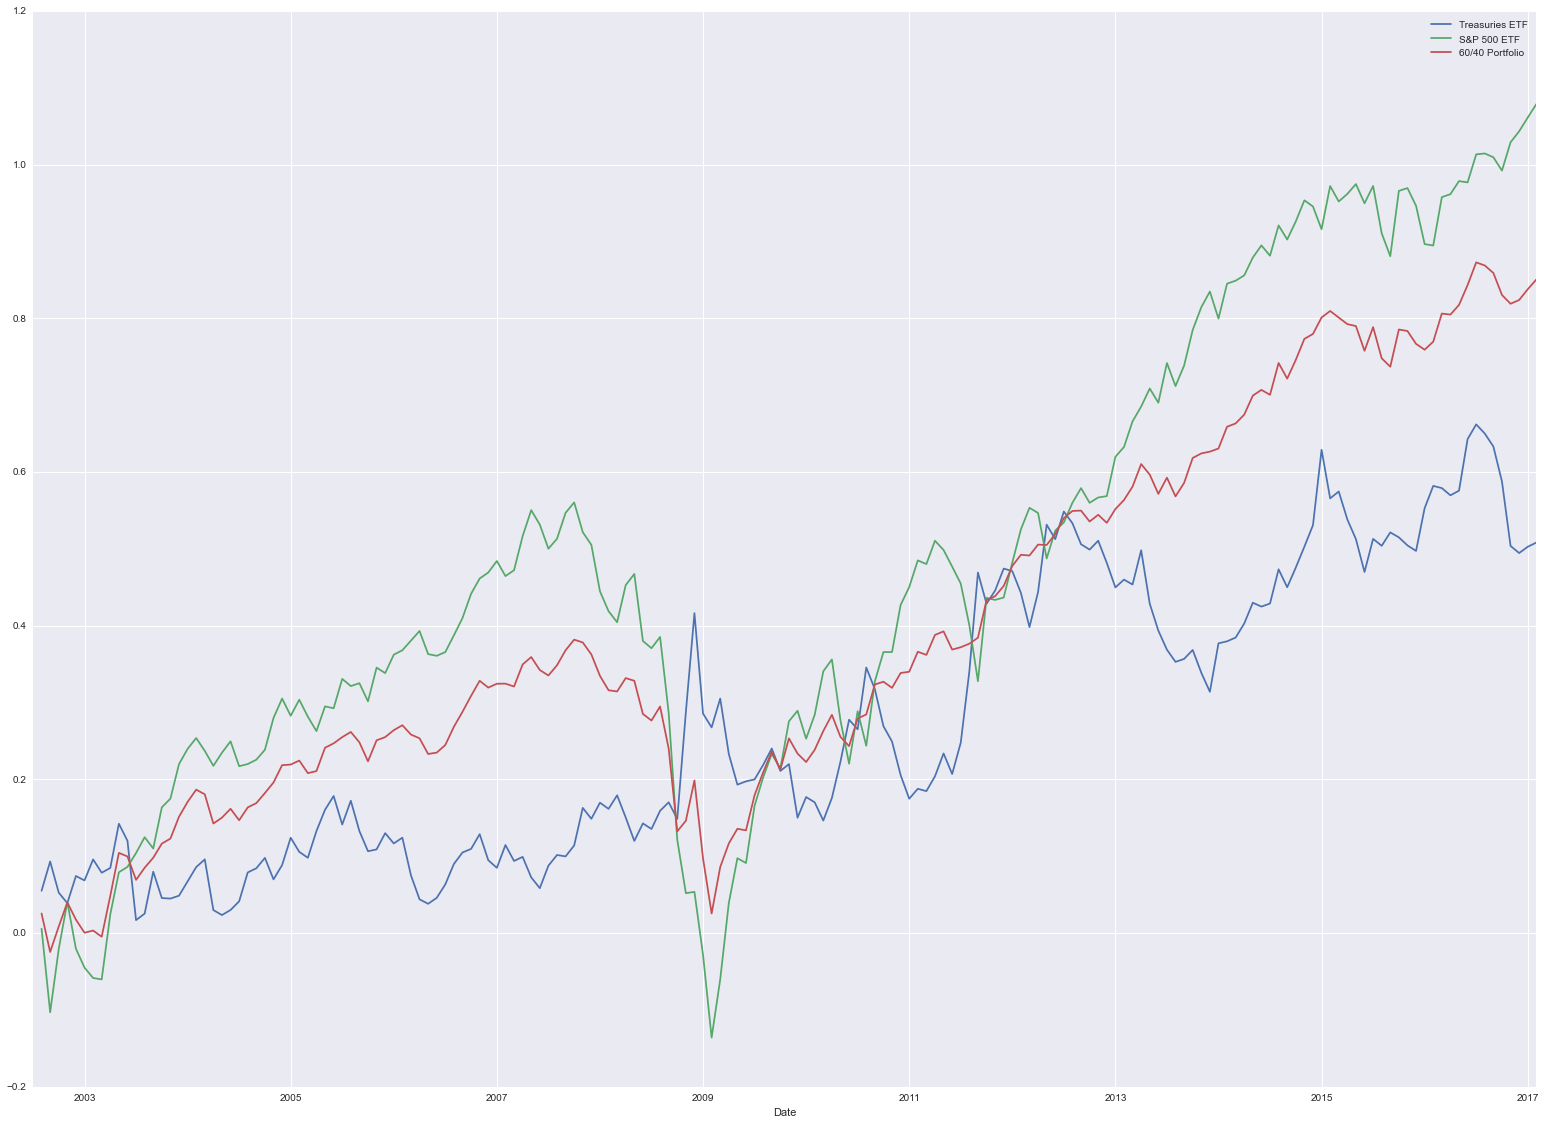

In [5]:
portfolio={'Treasuries ETF':.4,
          'S&P 500 ETF':.6
           }
final=pd.DataFrame()
for m in portfolio.keys():
    final[m]=library.read(m).data.Close.resample(rule='m',how='last')
weights=pd.Series(portfolio)
data=final.resample(rule='m',how='last').pct_change()*weights
final['60/40 Portfolio']=(1+data.sum(axis=1)).cumprod()
final.pct_change().cumsum().plot()

In [6]:
data=pd.DataFrame()
for m in library.list_symbols():
    if library.read_metadata(m).metadata['type']=='sector':
        data[m]=library.read(m).data.Close

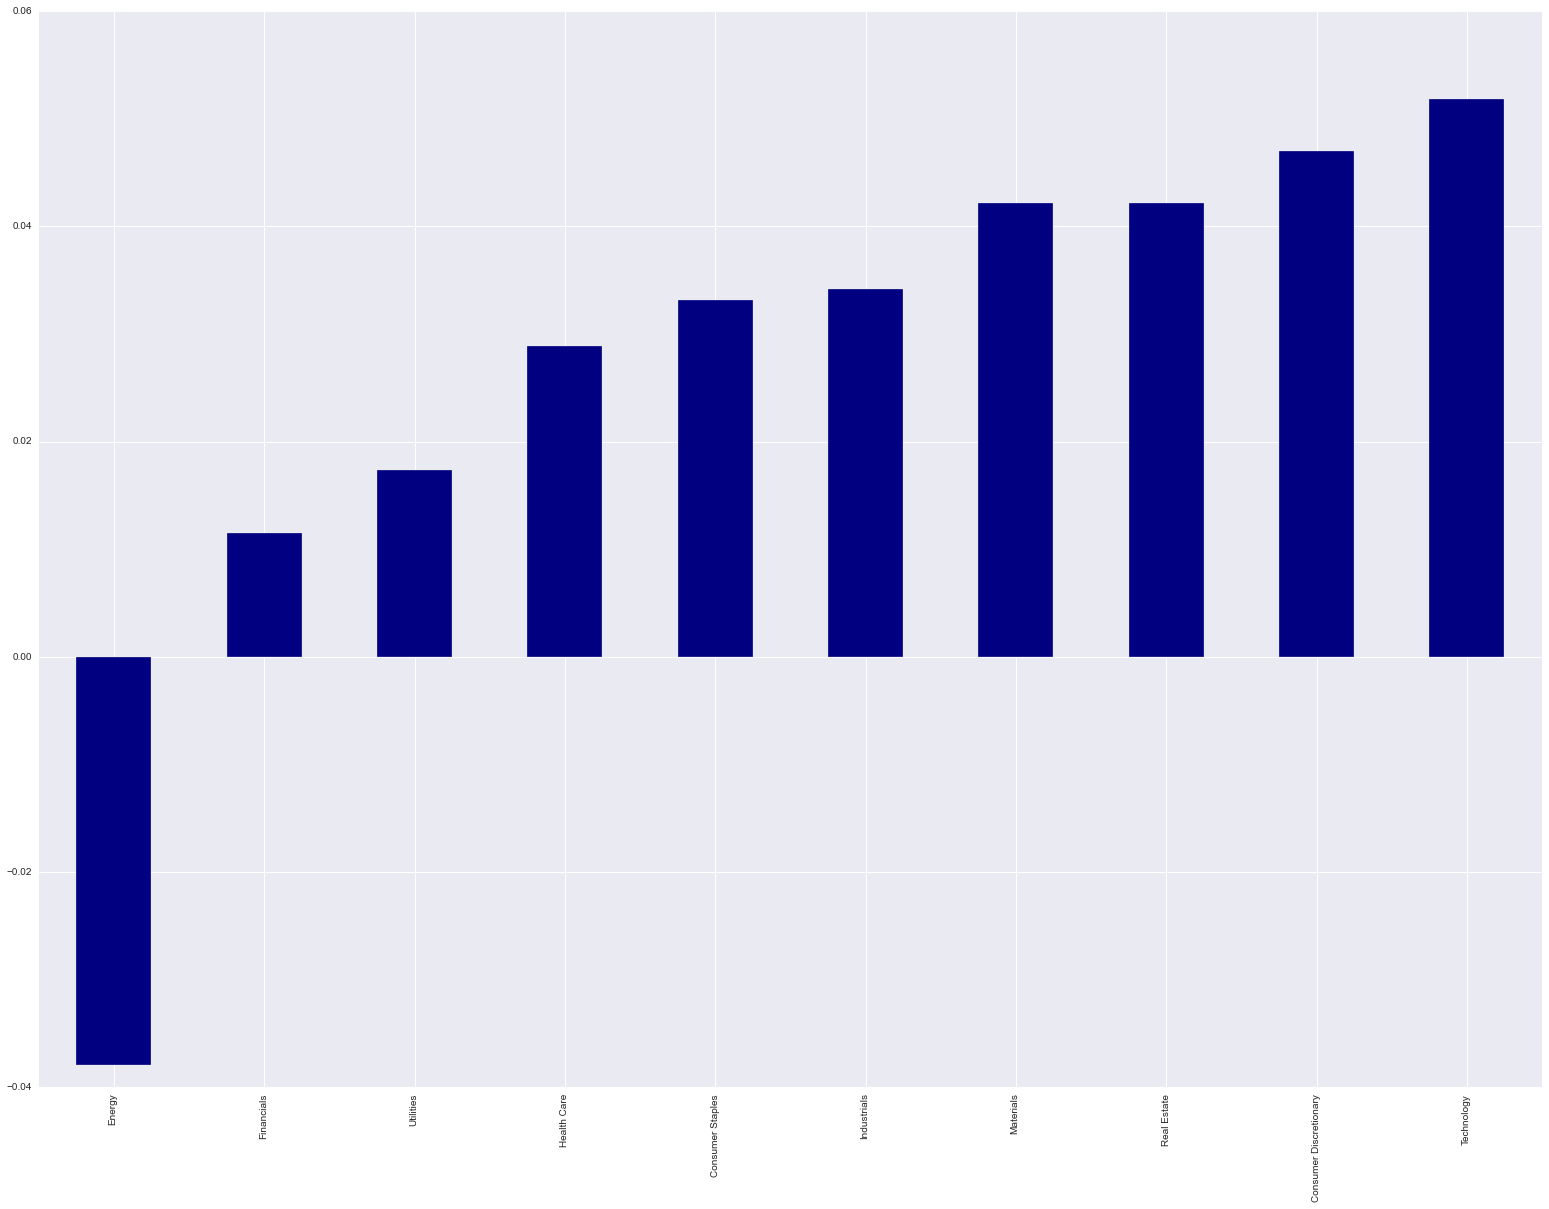

In [7]:
d=data.tail(1).T.columns[0]
final=(((data[str(d.year)]/data[str(d.year)].ix[0]).tail(1))-1).T[d].sort_values()
final.plot(colormap='jet',kind='bar') 

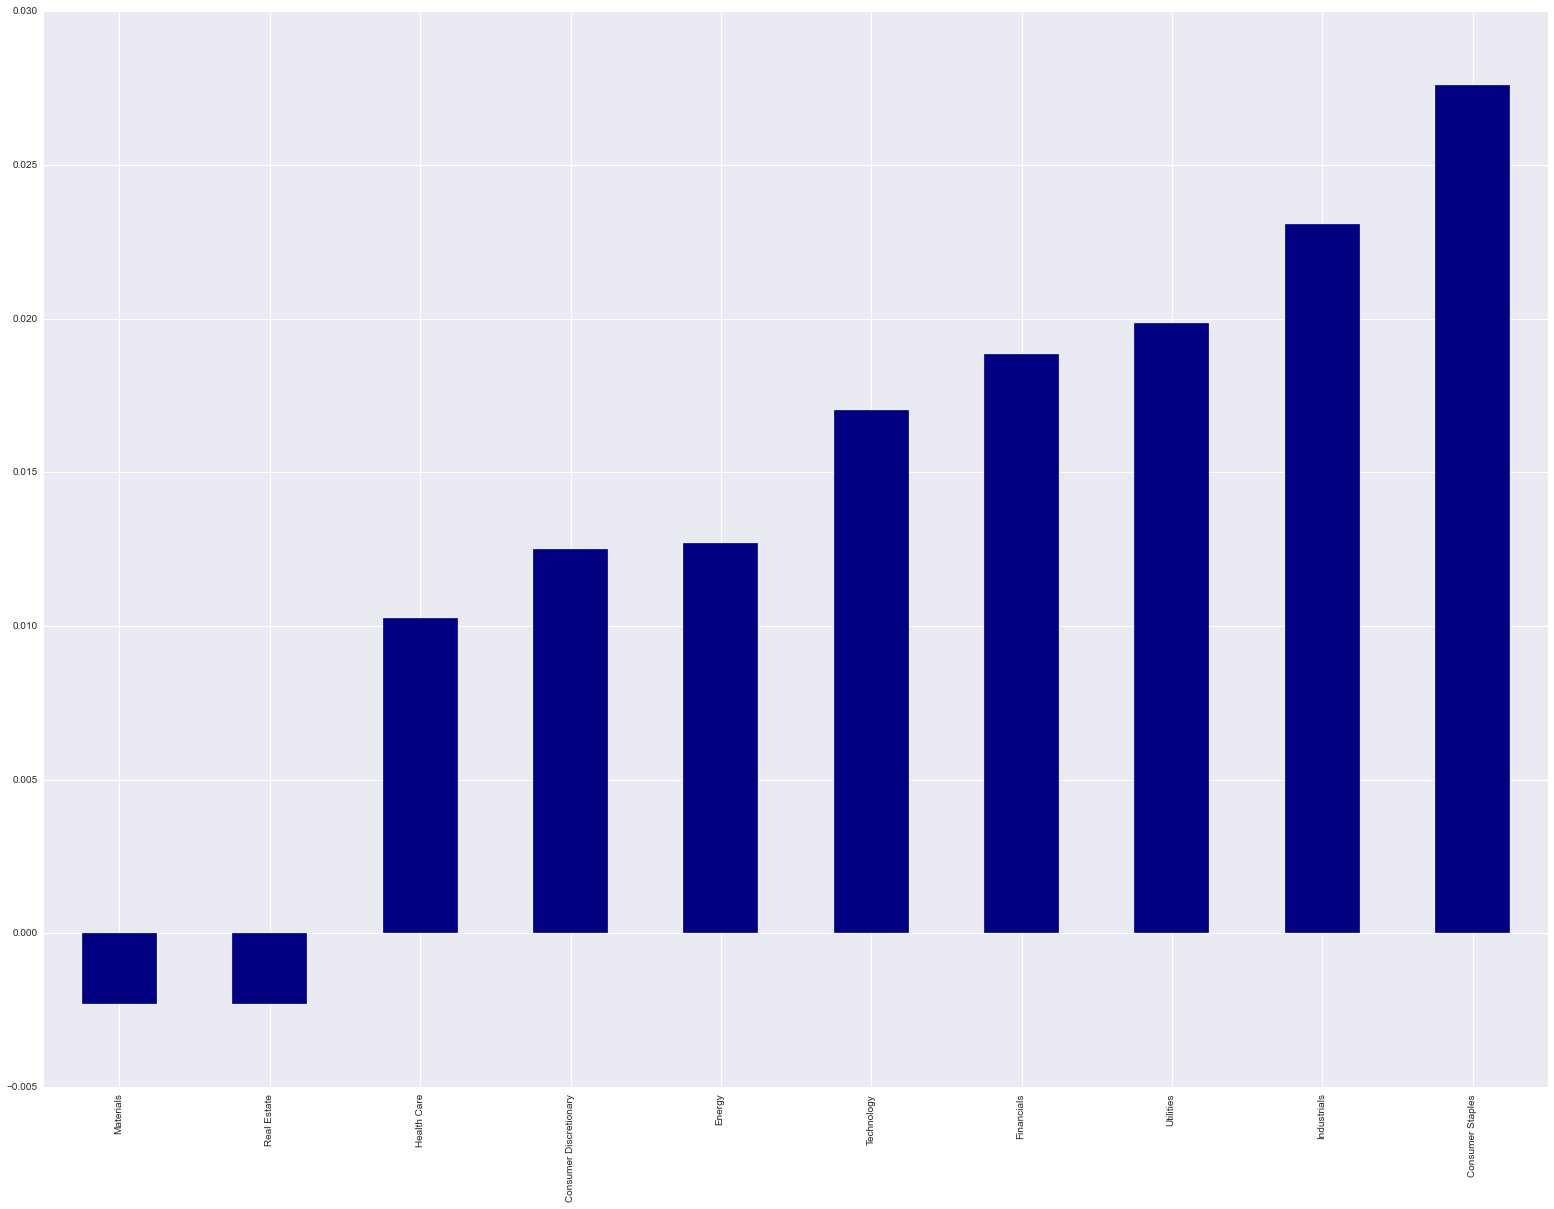

In [8]:
d=data.tail(1).T.columns[0]
final=(((data[str(d.year)+'-'+str(d.month)]/data[str(d.year)+'-'+str(d.month)].ix[0]).tail(1))-1).T[d].sort_values()
final.plot(colormap='jet',kind='bar') 

In [78]:
d=data.tail(1).T.columns[0]
d.year

2017

In [45]:
store = Arctic('localhost')
store.initialize_library('FUTURES')
library_futures = store['FUTURES']
store.initialize_library('ETF')
library_etf = store['ETF']
mkt = 'S&P 500'
final = library_futures.read(m).data.Close

NoDataFoundException: No data found for S&P 500 ETF in library arctic.FUTURES

In [101]:
def parse_data(data):
    x= serialize(data).split('series":')[1].split(',"yAxis":[{}]')[0]
    return x.split('}]')[0] + ',"type":"areaspline"}]'


In [64]:
serialize(final)

TypeError: to_dict() takes exactly 1 argument (2 given)

In [71]:
x=parse_data(df[['Energy']].head(1))

In [72]:
type(x)

str

In [97]:
x.split('}]')[0] + ',type:"areaspline"}]'

'[{"data":[[914284800000,23.27]],"name":"Energy","yAxis":0},type:"areaspline",type:"areaspline"}]'

In [102]:
x=parse_data(df[['Energy']].head(1))

In [103]:
x

'[{"data":[[914284800000,23.27]],"name":"Energy","yAxis":0,"type":"areaspline"}]'

In [73]:
serialize(df[['Energy']].head(1) )

'new Highcharts.Chart({"series":[{"data":[[914284800000,23.27]],"name":"Energy","yAxis":0}],"yAxis":[{}],"chart":{},"xAxis":{"type":"datetime","title":{"text":"Date"}},"legend":{"enabled":true}});'

In [75]:
import json
d = json.loads(x)

In [76]:
d

[{u'data': [[914284800000, 23.27]], u'name': u'Energy', u'yAxis': 0}]

In [78]:
type(d[0])

dict

In [82]:
json.dump(d)

TypeError: dump() takes at least 2 arguments (1 given)